In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from scipy.stats import zscore
from scipy.stats import stats
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix

### Read the input file and check the data dimension

In [3]:
# Read the data from CSV and load the data set.
data = pd.read_csv("german_credit.csv")

In [4]:
# Print the top 10 rows
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
data.shape

(1000, 21)

In [6]:
data.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [7]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [8]:
# check if there is any null data. As there is no null data this does not require and special processing.
data.isnull().values.any()

False

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [9]:
from sklearn.model_selection import train_test_split
X = data.drop("default", axis=1)
y = data.default
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.5)

In [10]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [11]:
# Print Shape of model data
data_d = pd.get_dummies(train_set)
data_d.shape

(500, 61)

In [12]:
data_d

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
613,24,3632,1,4,22,1,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
863,27,4526,4,2,32,2,2,0,0,0,...,1,0,0,0,0,1,0,1,0,1
725,6,250,2,2,41,2,1,0,0,0,...,1,0,0,0,0,1,1,0,0,1
85,12,1412,4,2,29,2,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1
737,18,4380,3,4,35,1,2,0,1,0,...,1,0,0,0,0,1,0,1,0,1
49,12,2073,4,2,28,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
137,12,766,4,3,66,1,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1
498,18,1301,4,2,32,1,1,1,0,0,...,1,0,0,0,0,1,1,0,0,1
809,15,1778,2,1,26,2,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
177,6,338,4,4,52,2,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [13]:
data_d.corr()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
duration_in_month,1.000000,0.624136,0.080358,-0.023286,-0.006099,-0.076622,0.009444,0.055295,0.018338,-0.140056,...,-0.018432,-0.086616,0.182087,-0.003181,0.003387,-0.172214,-0.227551,0.227551,-0.105121,0.105121
credit_amount,0.624136,1.000000,-0.270640,-0.025387,0.023885,-0.026668,0.015416,0.102734,-0.050382,-0.136038,...,-0.059032,-0.038195,0.325680,-0.145662,0.040919,-0.147003,-0.314999,0.314999,0.007156,-0.007156
installment_as_income_perc,0.080358,-0.270640,1.000000,0.012302,0.081675,0.007881,-0.093868,-0.026846,0.052349,-0.069384,...,0.071915,-0.106973,0.077821,0.022144,-0.111208,-0.058454,-0.069383,0.069383,-0.125483,0.125483
present_res_since,-0.023286,-0.025387,0.012302,1.000000,0.211715,0.108774,-0.000630,-0.032641,0.095684,0.009124,...,-0.229733,0.120468,-0.018246,0.013519,0.014374,-0.005038,-0.039692,0.039692,-0.048956,0.048956
age,-0.006099,0.023885,0.081675,0.211715,1.000000,0.184062,0.149852,-0.058556,-0.028667,0.078523,...,0.069854,-0.241098,0.139275,-0.160194,0.116897,0.020129,-0.134185,0.134185,0.002171,-0.002171
credits_this_bank,-0.076622,-0.026668,0.007881,0.108774,0.184062,1.000000,0.162727,-0.064693,-0.111418,-0.012175,...,0.078551,-0.109320,-0.037118,-0.007699,0.133048,-0.007295,-0.031316,0.031316,-0.003294,0.003294
people_under_maintenance,0.009444,0.015416,-0.093868,-0.000630,0.149852,0.162727,1.000000,-0.052330,0.008651,0.002006,...,0.042809,-0.080521,-0.071568,-0.045505,0.049712,0.105911,-0.003516,0.003516,0.083328,-0.083328
account_check_status_0 <= ... < 200 DM,0.055295,0.102734,-0.026846,-0.032641,-0.058556,-0.064693,-0.052330,1.000000,-0.364201,-0.148877,...,-0.024774,0.047964,0.029280,-0.094151,0.109713,0.046118,-0.002193,0.002193,-0.040275,0.040275
account_check_status_< 0 DM,0.018338,-0.050382,0.052349,0.095684,-0.028667,-0.111418,0.008651,-0.364201,1.000000,-0.145121,...,-0.089986,0.047105,-0.045791,0.037544,-0.033997,0.010517,0.043557,-0.043557,0.038800,-0.038800
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.140056,-0.136038,-0.069384,0.009124,0.078523,-0.012175,0.002006,-0.148877,-0.145121,1.000000,...,-0.044211,0.024486,0.008229,0.026463,0.075478,-0.070759,0.008489,-0.008489,0.050302,-0.050302


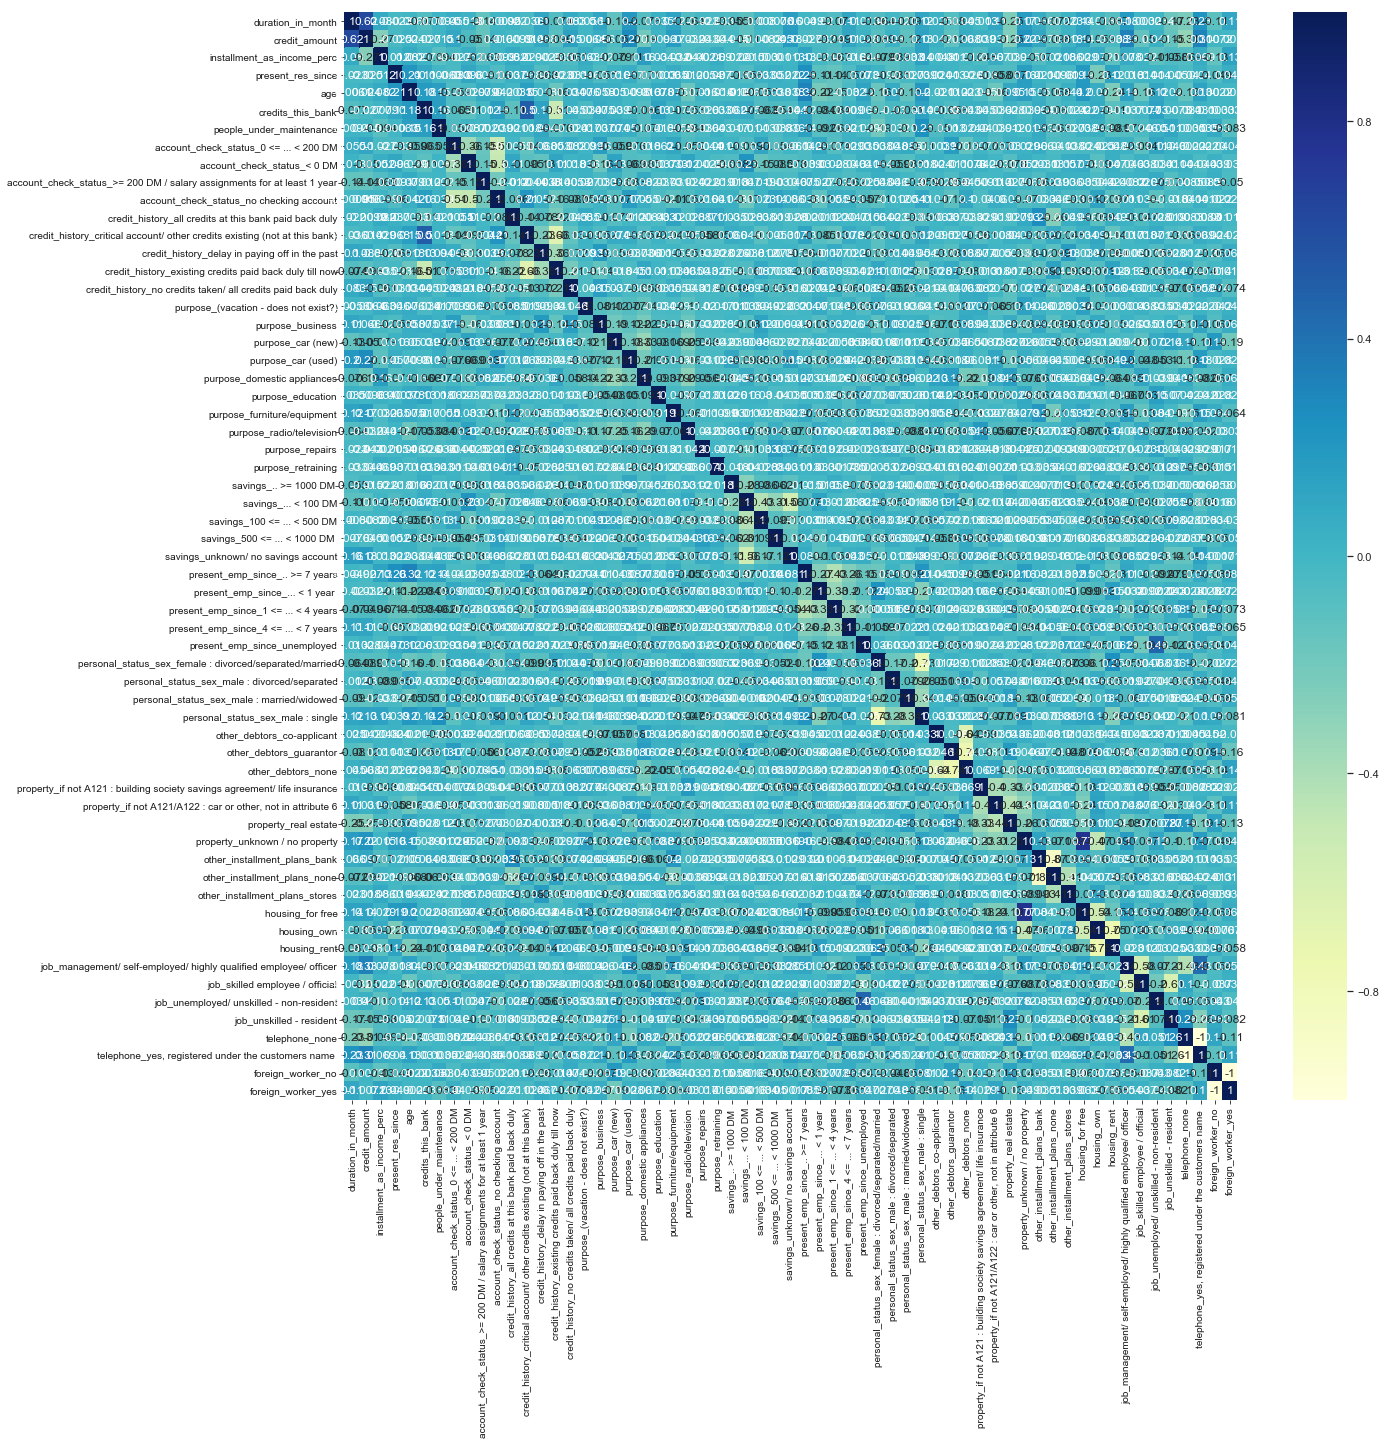

In [14]:
#Correlation analysis using heat map
f, ax = plt.subplots(figsize=(20, 20))
sns.set()
sns.heatmap(data_d.corr(),annot=True,cmap='YlGnBu')

### Drop the original variables which are converted to dummy

In [15]:
# This step is not required.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [16]:
from sklearn.model_selection import train_test_split
X = data_d
y = train_labels
train_set1, test_set1, train_labels1, test_labels1 = train_test_split(X, y, test_size=0.3)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [17]:
pd_Rf_model = RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=9999,n_jobs=2 )
pd_Rf_model.fit(train_set1,train_labels1)
y_pred_rf=pd_Rf_model.predict(test_set1)   # performance on test data
acc_Rf=accuracy_score(test_labels1,y_pred_rf)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [18]:
print("Accuracy score is ",acc_Rf)

Accuracy score is  0.7266666666666667


In [19]:
# Print the confusion matrix
cm = confusion_matrix(test_labels1,y_pred_rf)
print(cm)

[[97  9]
 [32 12]]


### Q6 Show the list of the features importance( 1 Marks)

In [20]:
feature_importances = pd_Rf_model.feature_importances_
feature_names = data_d.columns[0:62]
print(feature_names)
k = 9
top_k_idx = (feature_importances.argsort()[-k:][::-1])
print(feature_names[top_k_idx], feature_importances)

Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance', 'account_check_status_0 <= ... < 200 DM',
       'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_r

In [21]:
fet_imp = pd.DataFrame(pd_Rf_model.feature_importances_, columns = ["Imp"], index = data_d.columns)
fet_imp.sort_values(by = 'Imp',ascending=False)

,Imp
credit_amount,0.083300
age,0.075664
duration_in_month,0.074295
account_check_status_no checking account,0.052586
account_check_status_< 0 DM,0.046794
present_res_since,0.029653
installment_as_income_perc,0.029137
other_installment_plans_none,0.024588
savings_... < 100 DM,0.022925
credit_history_critical account/ other credits existing (not at this bank),0.021663


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# Evaluate using Cross Validation
from sklearn import model_selection

In [23]:
# Use below values
from sklearn.model_selection import cross_val_score, cross_val_predict
num_folds = 10
seed = 77
kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)

In [24]:
#Validate the Random Forest model build above using k fold
kfold

KFold(n_splits=10, random_state=77, shuffle=False)

In [25]:
#K-Fold Cross Validation ---this technique is used as number of data points is less
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(pd_Rf_model, train_set1,train_labels1, cv=kfold)
standard_dev = scores.std()
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

Cross-validated scores: [0.65714286 0.8        0.8        0.71428571 0.71428571 0.91428571
 0.82857143 0.68571429 0.82857143 0.74285714] [0.65714286 0.8        0.8        0.71428571 0.71428571 0.91428571
 0.82857143 0.68571429 0.82857143 0.74285714]
Average score: 0.7685714285714285


In [26]:
#Calculate Mean score
#Average score as calculated above in 75.14%

In [27]:
# Calculate score standard deviation using std()

In [28]:
score_means = list()
score_stds = list()
std = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

for std in std:
    this_scores = scores
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())
print("Standard Deviation:" , score_stds)

Standard Deviation: [0.07499659856232394, 0.07499659856232394, 0.07499659856232394, 0.07499659856232394, 0.07499659856232394, 0.07499659856232394, 0.07499659856232394, 0.07499659856232394, 0.07499659856232394, 0.07499659856232394]


# Q8 Print the confusion matrix( 1 Marks)

In [29]:
# Print the confusion matrix
cm = confusion_matrix(test_labels1,y_pred_rf)
print(cm)

[[97  9]
 [32 12]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [30]:
# Print the classification report.
Dt_cr=metrics.classification_report(test_labels1 , y_pred_rf)
print(Dt_cr)

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       106
           1       0.57      0.27      0.37        44

   micro avg       0.73      0.73      0.73       150
   macro avg       0.66      0.59      0.60       150
weighted avg       0.70      0.73      0.69       150



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [31]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve, auc

In [32]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels1,y_pred_rf)

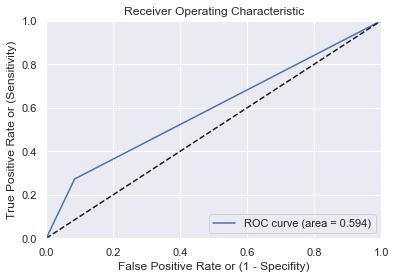

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(test_labels1,y_pred_rf)
roc_auc = auc(fpr,tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

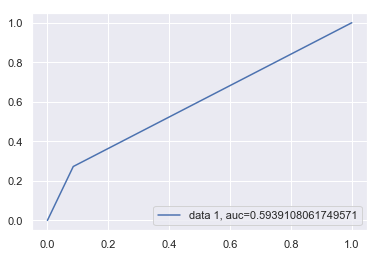

In [34]:
auc = metrics.roc_auc_score(test_labels1,y_pred_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [35]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []